In [1]:
pip install --upgrade tensorflow

     ------------------------------------- 276.5/276.5 MB 15.6 MB/s eta 0:00:00
     --------------------------------------- 14.9/14.9 MB 40.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 7.7 MB/s eta 0:00:00
     ------------------------------------- 440.8/440.8 kB 13.9 MB/s eta 0:00:00
     ---------------------------------------- 430.4/430.4 kB ? eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 59.1 MB/s eta 0:00:00
     ---------------------------------------- 181.8/181.8 kB ? eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 22.11.23
    Uninstalling flatbuffers-22.11.23:
      Successfully uninstalled flatbuffers-22.11.23
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: tensorboard-data-server
    Found exi

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [3]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns


DATADIR = r"C:\Users\13658\Documents\Semester 3\Minds and Machines\archive\Training"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]

## Data Mininng

In [28]:
import plotly.express as px
classes_info = {}
classes = sorted(os.listdir(DATADIR))
for name in classes:
    classes_info[name] = len(os.listdir(DATADIR + f'/{name}'))
print(classes_info)
fig = px.pie(names=classes_info.keys(),values=classes_info.values(),hole=0.05,title='CLasses Info')
fig.update_layout({'title':{"x":0.1}})
fig.show()

{'glioma_tumor': 826, 'meningioma_tumor': 822, 'no_tumor': 395, 'pituitary_tumor': 827}


### Training Data Preparation

In [29]:
glimoa_train = os.listdir(r"C:\Users\13658\Documents\Semester 3\Minds and Machines\archive\Training\glioma_tumor")
men_train =  os.listdir(r"C:\Users\13658\Documents\Semester 3\Minds and Machines\archive\Training\meningioma_tumor")
notumor_train = os.listdir(r"C:\Users\13658\Documents\Semester 3\Minds and Machines\archive\Training\no_tumor")
pit_train =  os.listdir(r"C:\Users\13658\Documents\Semester 3\Minds and Machines\archive\Training\pituitary_tumor")

<AxesSubplot:>

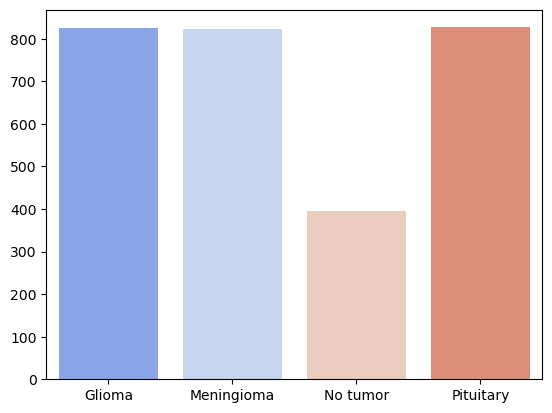

In [30]:
labels = ["Glioma", "Meningioma", "No tumor", "Pituitary"]
values = [len(glimoa_train), len(men_train), len(notumor_train), len(pit_train)]
sns.barplot(x = labels, y = values, palette="coolwarm")

In [31]:
IMG_SIZE = 150
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [32]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X.shape)
X = X/255.0  
X = X.reshape(-1,150,150,1)

(2870, 150, 150)


In [33]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [34]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=4)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.1, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (2583, 150, 150, 1)
x_test shape (287, 150, 150, 1)
y_train shape (2583, 4)
y_test shape (287, 4)


### Test Data Preparation

<AxesSubplot:>

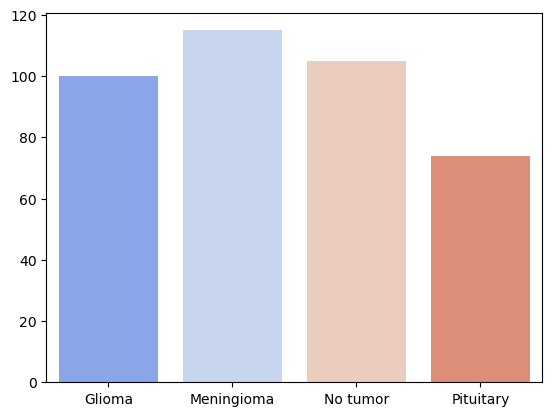

In [37]:
testDir = r"C:\Users\13658\Documents\Semester 3\Minds and Machines\archive\Testing"
testCategories = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
glimoa_test = os.listdir(r"C:\Users\13658\Documents\Semester 3\Minds and Machines\archive\Testing\glioma_tumor")
men_test =  os.listdir(r"C:\Users\13658\Documents\Semester 3\Minds and Machines\archive\Testing\meningioma_tumor")
notumor_test = os.listdir(r"C:\Users\13658\Documents\Semester 3\Minds and Machines\archive\Testing\no_tumor")
pit_test =  os.listdir(r"C:\Users\13658\Documents\Semester 3\Minds and Machines\archive\Testing\pituitary_tumor")
test_labels = ["Glioma", "Meningioma", "No tumor", "Pituitary"]
test_values = [len(glimoa_test), len(men_test), len(notumor_test), len(pit_test)]
sns.barplot(x = test_labels, y = test_values, palette="coolwarm")

In [38]:
test_classes_info = {}
classes = sorted(os.listdir(testDir))
for name in classes:
    test_classes_info[name] = len(os.listdir(testDir + f'/{name}'))
print(test_classes_info)
fig = px.pie(names=test_classes_info.keys(),values=test_classes_info.values(),hole=0.05,title='Test CLasses Info')
fig.update_layout({'title':{"x":0.1}})
fig.show()

{'glioma_tumor': 100, 'meningioma_tumor': 115, 'no_tumor': 105, 'pituitary_tumor': 74}


In [39]:
IMG_SIZE = 150
testing_data = []

def create_testing_data():
    for category in testCategories:
        path = os.path.join(testDir,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass
create_testing_data()


In [40]:
X_test = []
y_test = []
for features_test,test_labels in testing_data:
    X_test.append(features_test)
    y_test.append(test_labels)
X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X_test.shape)
X_test = X_test/255.0  
X_test = X_test.reshape(-1,150,150,1)

y_test = to_categorical(y_test, num_classes = 4)
Y_test = np.argmax(y_test,axis=1)

(394, 150, 150)


## Data Augmentation

Random Brightness: 80% - 120%

Random Contrast: 80% - 120%

In [55]:
# For Data Processing
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random

In [56]:
train_dir = 'C:/Users/13658/Documents/Semester 3/Minds and Machines/archive/Training/'

test_dir = 'C:/Users/13658/Documents/Semester 3/Minds and Machines/archive/Testing/'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+label):
        train_paths.append(train_dir+label+'/'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

In [57]:
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image

Let's plot some Samples :

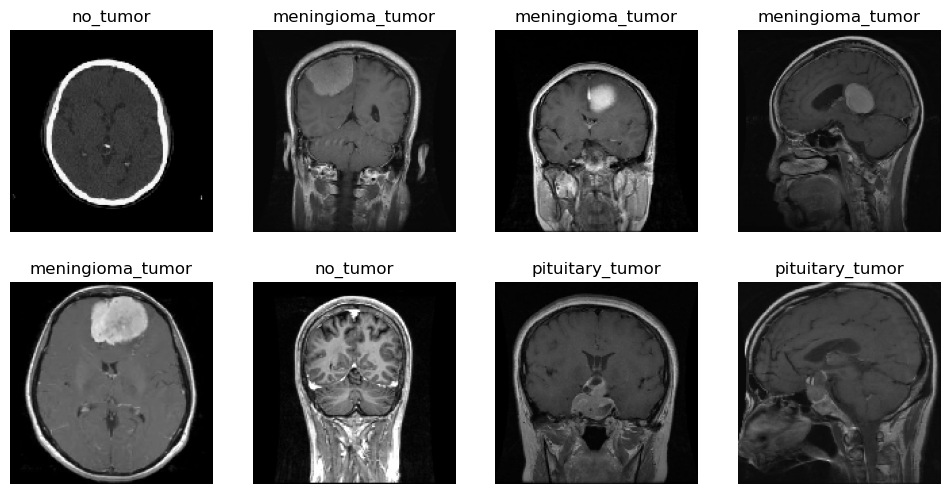

In [58]:
IMAGE_SIZE = 150

def open_images(paths):
    '''
    Given a list of paths to images, this function returns the images as arrays (after augmenting them)
    '''
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE,IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)

images = open_images(train_paths[50:59])
labels = train_labels[50:59]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 12})
plt.show()

### Importing Necessary libraries for model preparation

In [62]:
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop ,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Activation
from sklearn.metrics import classification_report

### Base Model

In [64]:
model1 =Sequential()
#4convolution layers and 2 maxpoollayer
model1.add(Conv2D(filters=32,kernel_size=5,input_shape=(150,150,1)))
model1.add(Activation('relu'))

model1.add(Conv2D(filters=32,kernel_size=4,input_shape=(150,150,1)))
model1.add(Activation('relu'))

model1.add(MaxPool2D(pool_size=3))

model1.add(Conv2D(filters=25,kernel_size=3,input_shape=(100,100,1)))
model1.add(Activation('relu'))

model1.add(Conv2D(filters=25,kernel_size=2,input_shape=(50,50,3)))
model1.add(Activation('relu'))

model1.add(MaxPool2D(pool_size=3))
#flatten layer
model1.add(Flatten())
#Deeeper hidden layer
model1.add(Dense(250))
model1.add(Activation('relu'))
#output layer
model1.add(Dense(4))
model1.add(Activation('sigmoid'))
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
epochs= 5

In [65]:
history1 = model1.fit(X_train,Y_train,epochs=epochs,validation_data=(X_val,Y_val))

Epoch 1/5
81/81 [==============================] - 40s 484ms/step - loss: 0.9897 - accuracy: 0.5869 - val_loss: 0.8263 - val_accuracy: 0.6551
Epoch 2/5
81/81 [==============================] - 39s 486ms/step - loss: 0.5789 - accuracy: 0.7689 - val_loss: 0.5539 - val_accuracy: 0.7666
Epoch 3/5
81/81 [==============================] - 39s 485ms/step - loss: 0.4406 - accuracy: 0.8211 - val_loss: 0.4882 - val_accuracy: 0.8223
Epoch 4/5
81/81 [==============================] - 40s 488ms/step - loss: 0.2783 - accuracy: 0.8924 - val_loss: 0.5031 - val_accuracy: 0.8188
Epoch 5/5
81/81 [==============================] - 45s 558ms/step - loss: 0.2037 - accuracy: 0.9214 - val_loss: 0.3653 - val_accuracy: 0.8885


In [66]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 146, 146, 32)      832       
                                                                 
 activation_6 (Activation)   (None, 146, 146, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 143, 143, 32)      16416     
                                                                 
 activation_7 (Activation)   (None, 143, 143, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 47, 47, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 45, 45, 25)        7225      
                                                      

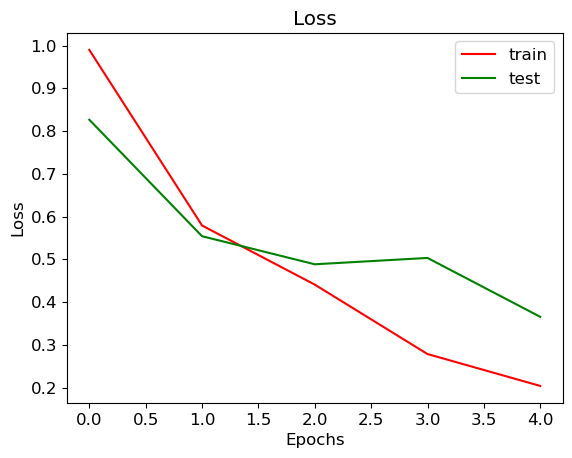

In [67]:
plt.plot(history1.history["loss"],c = "red")
plt.plot(history1.history["val_loss"],c = "green")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

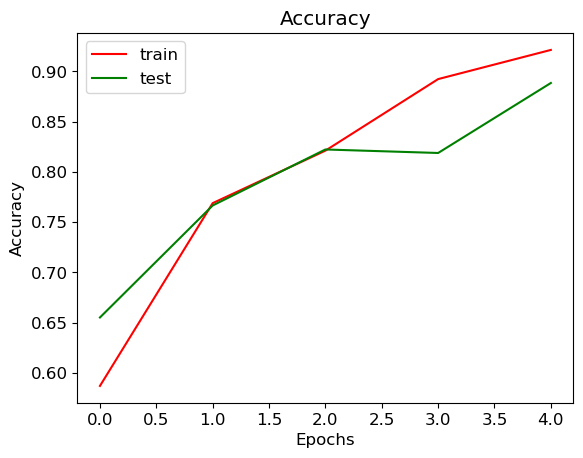

In [68]:
plt.plot(history1.history["accuracy"],c = "red")
plt.plot(history1.history["val_accuracy"],c = "green")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [69]:
model1.save('brain_tumor1.h5')

C:\Users\13658\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [70]:
predict_x_test1 =model1.predict(X_test) 
classes_x_test1 =np.argmax(predict_x_test1,axis=1)
classes_x_test1

13/13 [==============================] - 1s 72ms/step


array([2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 3, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 3, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 3, 1, 2, 2, 1, 2, 1, 1, 2, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [71]:
print(classification_report(Y_test,classes_x_test1,target_names=classes))

                  precision    recall  f1-score   support

    glioma_tumor       0.89      0.17      0.29       100
meningioma_tumor       0.68      0.90      0.77       115
        no_tumor       0.58      0.96      0.72       105
 pituitary_tumor       0.90      0.61      0.73        74

        accuracy                           0.68       394
       macro avg       0.76      0.66      0.63       394
    weighted avg       0.75      0.68      0.63       394



Confusion Matrix


Text(97.2222222222222, 0.5, 'Predicted class')

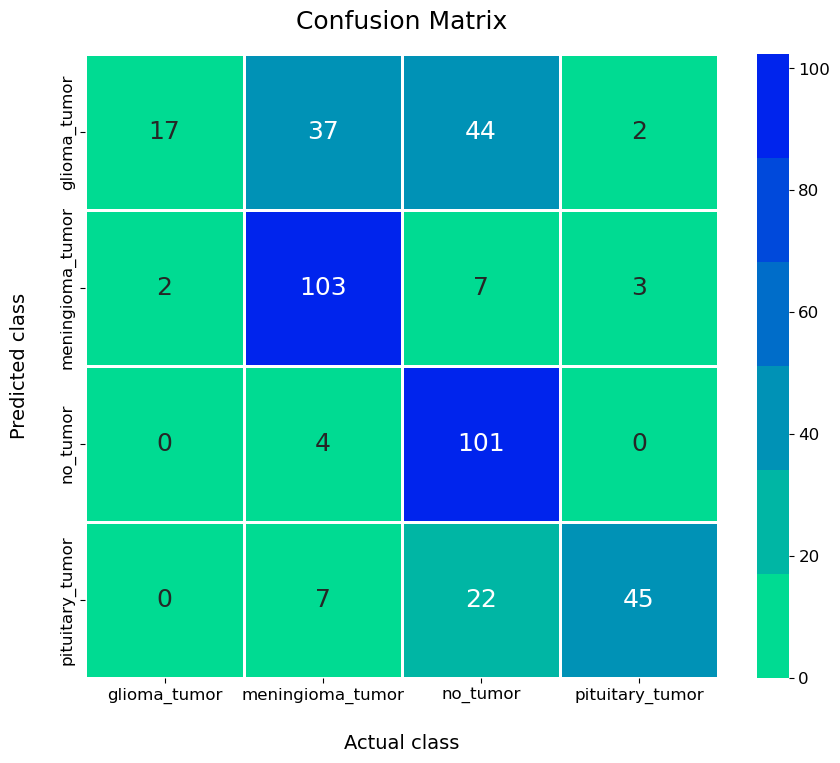

In [72]:
print('Confusion Matrix')
cm = confusion_matrix(Y_test, classes_x_test1)
fig,ax= plt.subplots(figsize=(10.2,8.1))
a=sns.color_palette("winter_r")  #_r inverts the palette
sns.heatmap(cm, annot=True,fmt='g',linewidths=1,linecolor='white',robust=True,annot_kws={"size":18},cmap=a)
#annot_kws: settings about annotations
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);
plt.yticks(va="center")
plt.title('Confusion Matrix',fontsize=18,pad=18)
plt.xlabel('Actual class',labelpad=22,fontsize=14)
plt.ylabel('Predicted class',labelpad=22,fontsize=14)

### Tuning 1

An early stopping concept is used for epoch 10 which is increased from the base model where epoch was 5

In [73]:
model2 =Sequential()
#4convolution layers and 2 maxpoollayer
model2.add(Conv2D(filters=32,kernel_size=5,input_shape=(150,150,1)))
model2.add(Activation('relu'))

model2.add(Conv2D(filters=32,kernel_size=4,input_shape=(150,150,1)))
model2.add(Activation('relu'))

model2.add(MaxPool2D(pool_size=3))

model2.add(Conv2D(filters=25,kernel_size=3,input_shape=(100,100,1)))
model2.add(Activation('relu'))

model2.add(Conv2D(filters=25,kernel_size=2,input_shape=(50,50,3)))
model2.add(Activation('relu'))

model2.add(MaxPool2D(pool_size=3))
#flatten layer
model2.add(Flatten())
#Deeeper hidden layer
model2.add(Dense(250))
model2.add(Activation('relu'))
#output layer
model2.add(Dense(4))
model2.add(Activation('sigmoid'))
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
epochs= 10

In [74]:
from keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [75]:
histor2 = model2.fit(X_train,Y_train,epochs=epochs,validation_data=(X_val,Y_val),callbacks=[early_stop])

Epoch 1/10
81/81 [==============================] - 40s 492ms/step - loss: 1.0329 - accuracy: 0.5412 - val_loss: 0.7930 - val_accuracy: 0.6969
Epoch 2/10
81/81 [==============================] - 42s 516ms/step - loss: 0.6475 - accuracy: 0.7313 - val_loss: 0.6183 - val_accuracy: 0.7561
Epoch 3/10
81/81 [==============================] - 39s 477ms/step - loss: 0.4660 - accuracy: 0.8184 - val_loss: 0.5647 - val_accuracy: 0.7700
Epoch 4/10
81/81 [==============================] - 39s 477ms/step - loss: 0.3400 - accuracy: 0.8618 - val_loss: 0.5402 - val_accuracy: 0.8258
Epoch 5/10
81/81 [==============================] - 39s 486ms/step - loss: 0.2257 - accuracy: 0.9183 - val_loss: 0.5037 - val_accuracy: 0.8502
Epoch 6/10
81/81 [==============================] - 40s 493ms/step - loss: 0.1619 - accuracy: 0.9350 - val_loss: 0.5510 - val_accuracy: 0.8362
Epoch 7/10
81/81 [==============================] - 40s 488ms/step - loss: 0.1235 - accuracy: 0.9551 - val_loss: 0.5669 - val_accuracy: 0.8432

In [76]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 146, 146, 32)      832       
                                                                 
 activation_12 (Activation)  (None, 146, 146, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 143, 143, 32)      16416     
                                                                 
 activation_13 (Activation)  (None, 143, 143, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 47, 47, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 45, 25)        7225      
                                                      

In [77]:
model2.save('brain_tumor2.h5')

C:\Users\13658\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



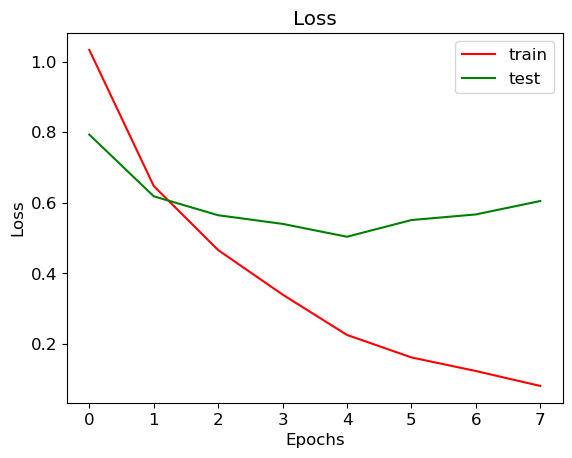

In [78]:
plt.plot(histor2.history["loss"],c = "red")
plt.plot(histor2.history["val_loss"],c = "green")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

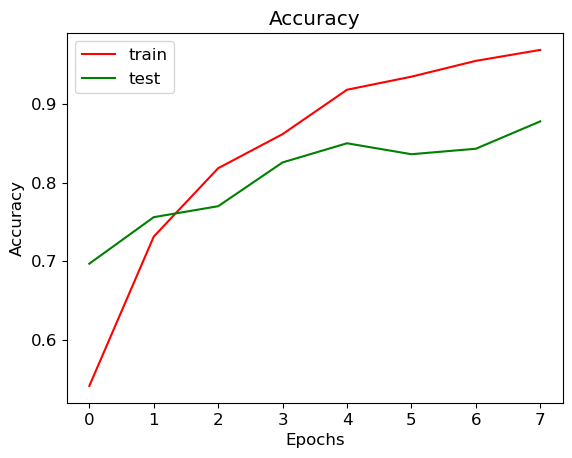

In [79]:
plt.plot(histor2.history["accuracy"],c = "red")
plt.plot(histor2.history["val_accuracy"],c = "green")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [80]:
predict_x_test2 =model2.predict(X_test) 
classes_x_test2 =np.argmax(predict_x_test2,axis=1)
classes_x_test2

13/13 [==============================] - 1s 74ms/step


array([2, 2, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1, 3, 2, 3, 1, 2, 1,
       2, 3, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3, 1, 1, 2,
       2, 3, 3, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [81]:
print(classification_report(Y_test,classes_x_test2,target_names=classes))

                  precision    recall  f1-score   support

    glioma_tumor       0.95      0.20      0.33       100
meningioma_tumor       0.77      0.86      0.81       115
        no_tumor       0.63      0.98      0.77       105
 pituitary_tumor       0.84      0.92      0.88        74

        accuracy                           0.74       394
       macro avg       0.80      0.74      0.70       394
    weighted avg       0.79      0.74      0.69       394



Confusion Matrix


Text(97.2222222222222, 0.5, 'Predicted class')

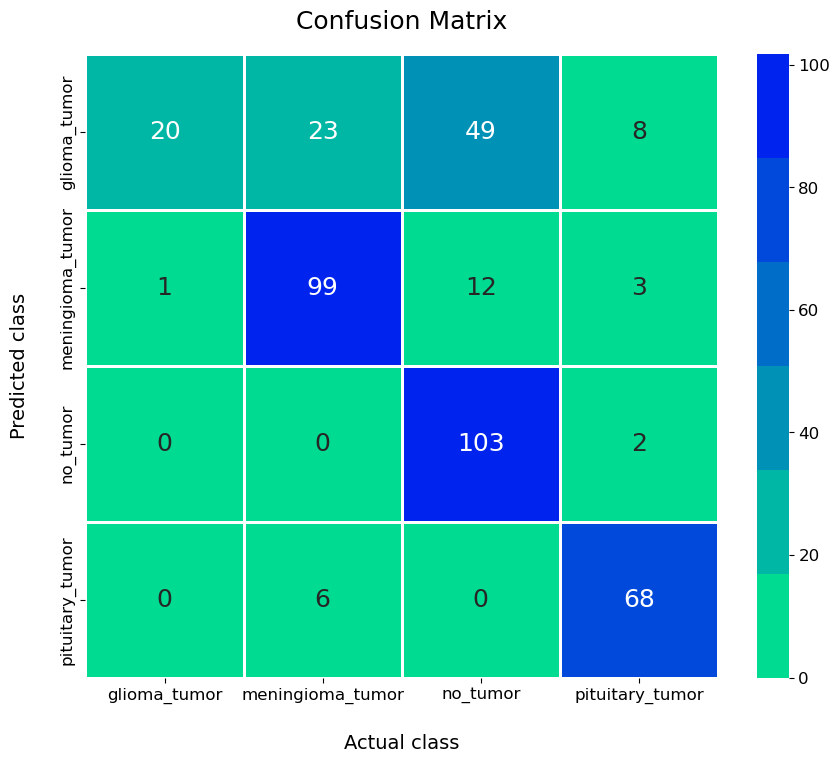

In [82]:
print('Confusion Matrix')
cm = confusion_matrix(Y_test, classes_x_test2)
fig,ax= plt.subplots(figsize=(10.2,8.1))
a=sns.color_palette("winter_r")  #_r inverts the palette
sns.heatmap(cm, annot=True,fmt='g',linewidths=1,linecolor='white',robust=True,annot_kws={"size":18},cmap=a)
#annot_kws: settings about annotations
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);
plt.yticks(va="center")
plt.title('Confusion Matrix',fontsize=18,pad=18)
plt.xlabel('Actual class',labelpad=22,fontsize=14)
plt.ylabel('Predicted class',labelpad=22,fontsize=14)

### Tuning 2

In the second tuning stage, the following strategies used are:
1. Modification in CNN topology with changed in number of filters, kernel size and batch size, activation layer to softmax
2. Addition of Hyperparameters- padding, strides
3. Addition of Dropout layers

In [86]:
model3 = Sequential()
#
model3.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,1)))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
#
model3.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.25))

model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))
#
model3.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))

#
model3.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))

# 
model3.add(Flatten())
model3.add(Dense(1024, activation = "relu"))
model3.add(Dropout(0.5))
model3.add(Dense(4, activation = "softmax"))
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model3.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 15 
batch_size = 40

In [87]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=False,  
        vertical_flip=False) 

In [88]:
datagen.fit(X_train)
history3 = model3.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size, callbacks=[early_stop]) 

Epoch 1/15
64/64 [==============================] - 47s 717ms/step - loss: 1.1950 - accuracy: 0.4589 - val_loss: 0.9956 - val_accuracy: 0.5749
Epoch 2/15
64/64 [==============================] - 46s 715ms/step - loss: 0.8594 - accuracy: 0.6410 - val_loss: 0.9365 - val_accuracy: 0.5714
Epoch 3/15
64/64 [==============================] - 42s 660ms/step - loss: 0.7269 - accuracy: 0.6945 - val_loss: 0.8342 - val_accuracy: 0.5993
Epoch 4/15
64/64 [==============================] - 43s 678ms/step - loss: 0.6492 - accuracy: 0.7352 - val_loss: 0.8726 - val_accuracy: 0.6132
Epoch 5/15
64/64 [==============================] - 42s 662ms/step - loss: 0.5636 - accuracy: 0.7578 - val_loss: 0.8207 - val_accuracy: 0.6167
Epoch 6/15
64/64 [==============================] - 43s 674ms/step - loss: 0.5176 - accuracy: 0.7979 - val_loss: 0.5698 - val_accuracy: 0.7526
Epoch 7/15
64/64 [==============================] - 42s 648ms/step - loss: 0.4385 - accuracy: 0.8238 - val_loss: 0.5320 - val_accuracy: 0.7700

In [89]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 64)      1664      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 75, 75, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 75, 75, 64)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 37, 37, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 37, 37, 128)      

In [90]:
model3.save('brain_tumor3.h5')

C:\Users\13658\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



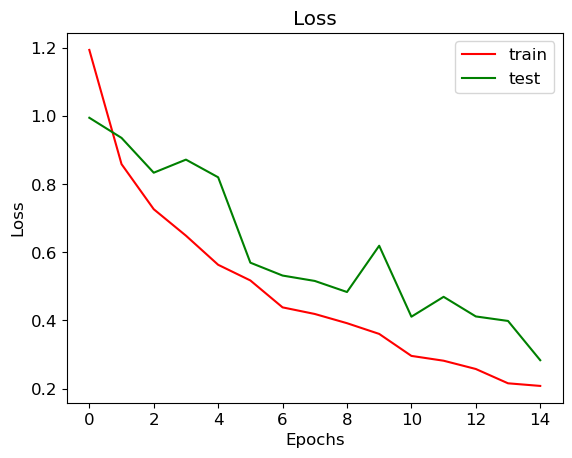

In [91]:
plt.plot(history3.history["loss"],c = "red")
plt.plot(history3.history["val_loss"],c = "green")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

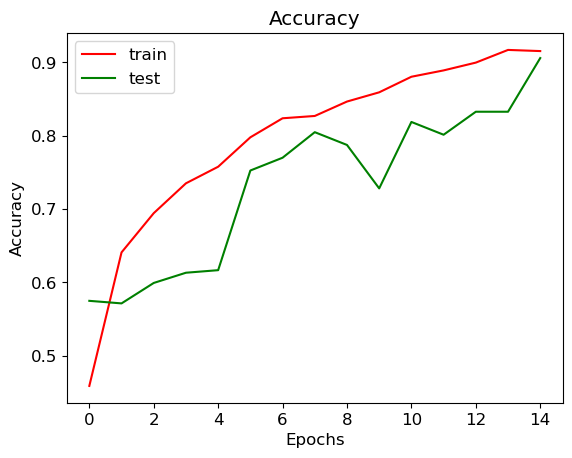

In [92]:
plt.plot(history3.history["accuracy"],c = "red")
plt.plot(history3.history["val_accuracy"],c = "green")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [93]:
predict_x_test3 =model3.predict(X_test) 
classes_x_test3 =np.argmax(predict_x_test3,axis=1)
classes_x_test3

13/13 [==============================] - 1s 100ms/step


array([1, 1, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 3, 2, 1, 1, 1, 3, 2, 0, 2, 2, 1,
       2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 0, 2,
       2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [94]:
print(classification_report(Y_test,classes_x_test3,target_names=classes))

                  precision    recall  f1-score   support

    glioma_tumor       0.64      0.21      0.32       100
meningioma_tumor       0.68      0.88      0.77       115
        no_tumor       0.62      0.98      0.76       105
 pituitary_tumor       0.85      0.53      0.65        74

        accuracy                           0.67       394
       macro avg       0.70      0.65      0.62       394
    weighted avg       0.68      0.67      0.63       394



Confusion Matrix


Text(97.2222222222222, 0.5, 'Predicted class')

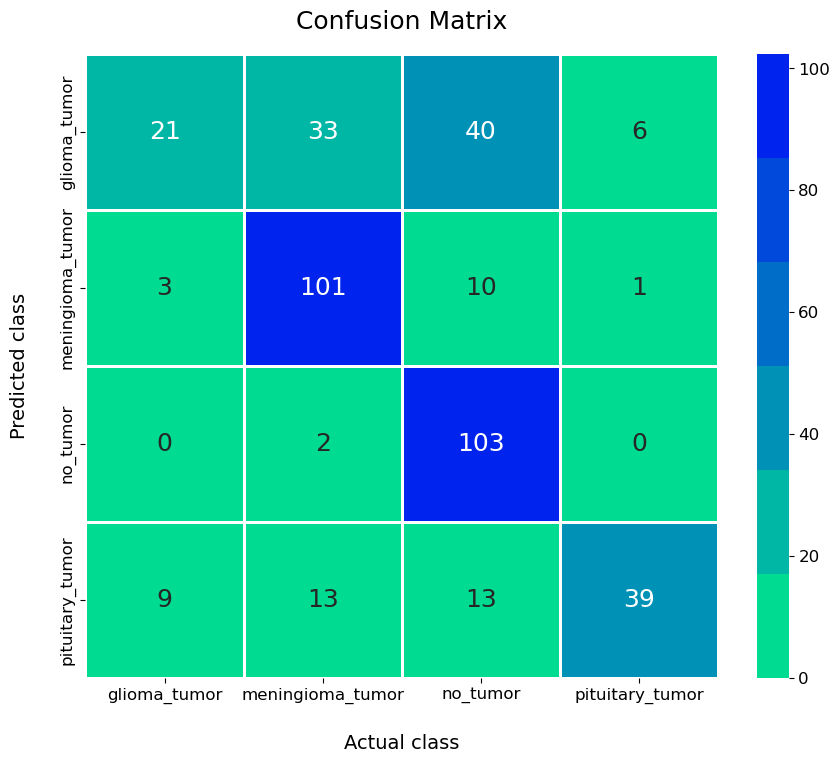

In [95]:
print('Confusion Matrix')
cm = confusion_matrix(Y_test, classes_x_test3)
fig,ax= plt.subplots(figsize=(10.2,8.1))
a=sns.color_palette("winter_r")  #_r inverts the palette
sns.heatmap(cm, annot=True,fmt='g',linewidths=1,linecolor='white',robust=True,annot_kws={"size":18},cmap=a)
#annot_kws: settings about annotations
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);
plt.yticks(va="center")
plt.title('Confusion Matrix',fontsize=18,pad=18)
plt.xlabel('Actual class',labelpad=22,fontsize=14)
plt.ylabel('Predicted class',labelpad=22,fontsize=14)